<a href="https://colab.research.google.com/github/yotamgardosh/Churn-Modelling/blob/main/Chrun_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installs

In [ ]:
# Step 1: Install Kaggle API
!pip install kaggle

# Step 2: Upload kaggle.json
from google.colab import files
files.upload()

# Step 3: Move kaggle.json to the right directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the dataset
!kaggle datasets download -d shubh0799/churn-modelling

# Step 5: Extract the downloaded dataset
!unzip churn-modelling.zip

# for quick EDA
!pip install ydata-profiling


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/shubh0799/churn-modelling
License(s): CC0-1.0
churn-modelling.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  churn-modelling.zip
replace Churn_Modelling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 35.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=00be7ed9641cf0a6e955a15e8849508315939af854c2e14cb502fb987c40cff4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

## Exploratory Data Analysis (EDA)

In [ ]:
profile = ProfileReport(df, title="Churn Dataset Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Display basic statistics and distributions
print(df.describe())
print(df.info())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

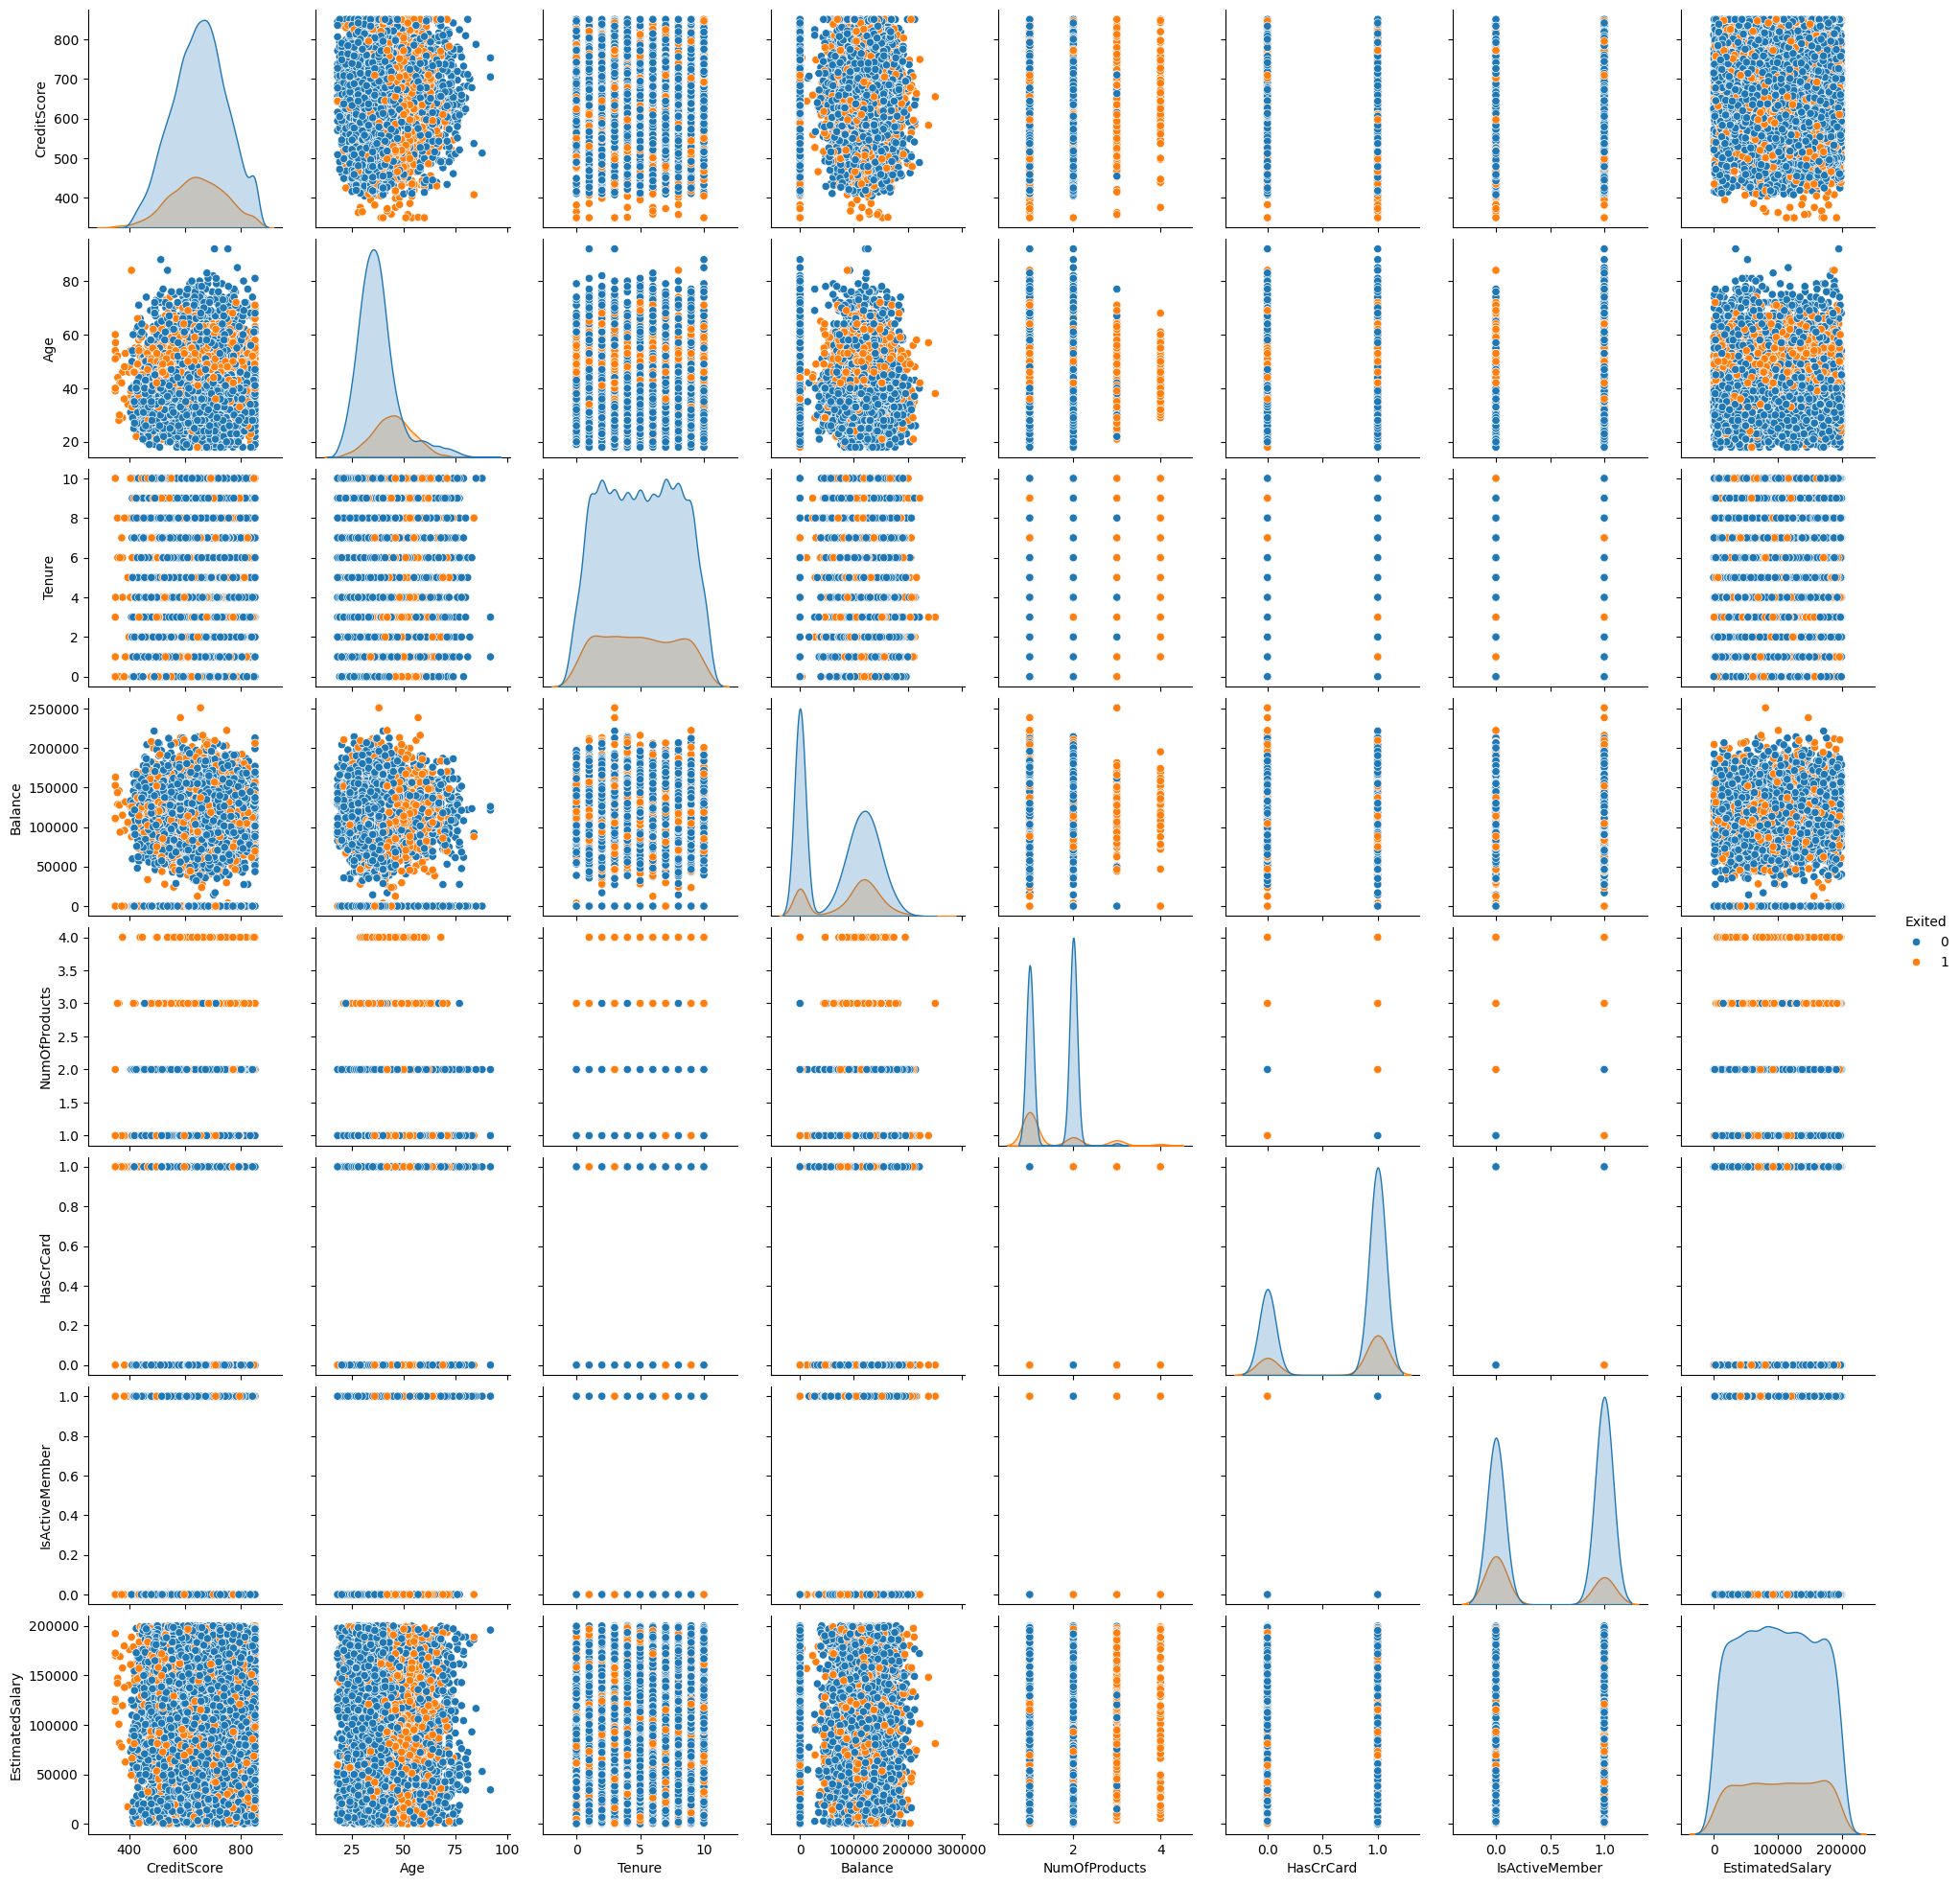

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Visualize distributions
initial_plot_df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=False)

sns.pairplot(initial_plot_df, hue='Exited')
plt.show()

##Data Preprocessing

In [ ]:
# Drop columns that are not useful for prediction
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Split the data into features and target variable
X = df.drop(['Exited'], axis = 1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42)

# Scale the features - scale separately to avoid data leakage
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Benchmark results using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# init, train and test basic logistic regression model
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8124
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      2003
           1       0.59      0.18      0.28       497

    accuracy                           0.81      2500
   macro avg       0.71      0.58      0.58      2500
weighted avg       0.78      0.81      0.77      2500

Confusion Matrix:
 [[1941   62]
 [ 407   90]]


###Analysis
1. High Accuracy but Low Recall for Class 1:
* The model has a high overall accuracy (81.24%) primarily due to its
performance on the majority class (non-churners).
* The recall for churners (class 1) is very low (18%), meaning the model is not good at identifying actual churners.
2. Imbalance in Precision and Recall:
* The precision for churners (class 1) is better than recall but still relatively low (59%). This indicates that when the model predicts a customer will churn, it is often wrong.
3. F1-Score Indicates Poor Performance for Churners:
* The F1-score for churners (0.28) shows a poor balance between precision and recall, indicating the model struggles to correctly predict churners.

## Hyperparameter Tuning - Grid Search Cross Validation


In [38]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb

In [39]:
random_state = 42
classifiers = [
    DecisionTreeClassifier(random_state=random_state),
    SVC(random_state=random_state),
    RandomForestClassifier(random_state=random_state),
    LogisticRegression(random_state=random_state, max_iter=1000),
    KNeighborsClassifier(),
    xgb.XGBClassifier(random_state=random_state, use_label_encoder=False),
    lgb.LGBMClassifier(random_state=random_state)
]

# Define parameter grids for each classifier
dt_param_grid = {
    "min_samples_split": range(10, 500, 20),
    "max_depth": range(1, 20, 2)
}

svc_param_grid = {
    'kernel': ['rbf'],
    'gamma': [0.001, 0.01, 0.1, 1],
    'C': [1, 10, 50, 100, 200, 300, 1000]
}

rf_param_grid = {
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [False],
    "n_estimators": [100, 300],
    "criterion": ["gini"]
}

logreg_param_grid = {
    "C": np.logspace(-3, 3, 7),
    "penalty": ["l1", "l2"],
    "solver": ['liblinear']  # 'liblinear' is required for 'l1' penalty
}

knn_param_grid = {
    "n_neighbors": np.linspace(1, 19, 10, dtype=int).tolist(),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

xgb_param_grid = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "n_estimators": [100, 200],
    "colsample_bytree": [0.3, 0.7]
}

lgb_param_grid = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "n_estimators": [100, 200],
    "num_leaves": [31, 50]
}

classifier_param = [
    dt_param_grid,
    svc_param_grid,
    rf_param_grid,
    logreg_param_grid,
    knn_param_grid,
    xgb_param_grid,
    lgb_param_grid
]


In [42]:
from sklearn.model_selection import GridSearchCV

best_estimators = []
cv_res = []

for classifier, param_grid in zip(classifiers, classifier_param):
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid,
                               cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators.append(grid_search.best_estimator_)
    cv_res.append(grid_search.best_score_)
    print(f"Best parameters for {classifier.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best score for {classifier.__class__.__name__}: {grid_search.best_score_}\n")


Best parameters for DecisionTreeClassifier: {'max_depth': 5, 'min_samples_split': 110}
Best score for DecisionTreeClassifier: 0.8541333333333332

Best parameters for SVC: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best score for SVC: 0.8552

Best parameters for RandomForestClassifier: {'bootstrap': False, 'criterion': 'gini', 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best score for RandomForestClassifier: 0.8588000000000001

Best parameters for LogisticRegression: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for LogisticRegression: 0.8064

Best parameters for KNeighborsClassifier: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best score for KNeighborsClassifier: 0.8378666666666665

Best parameters for XGBClassifier: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best score for XGBClassifier: 0.8601333333333333

[LightGBM] [Warning] Accuracy may be bad since you didn'

In [44]:
cv_res

[0.8541333333333332,
 0.8552,
 0.8588000000000001,
 0.8064,
 0.8378666666666665,
 0.8601333333333333,
 0.86]

In [45]:
best_estimators


[DecisionTreeClassifier(max_depth=5, min_samples_split=110, random_state=42),
 SVC(C=100, gamma=0.01, random_state=42),
 RandomForestClassifier(bootstrap=False, max_features=3, min_samples_leaf=10,
                        n_estimators=300, random_state=42),
 LogisticRegression(max_iter=1000, penalty='l1', random_state=42,
                    solver='liblinear'),
 KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance'),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.3, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=4, max_leaves=None,
 

In [47]:
cv_res_df = pd.DataFrame({"Cross Validation Means":cv_res, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression", "KNeighborsClassifier", "XGBoost", "LightGBM"]})
cv_res_df

Cross Validation Means               ML Models
0                0.854133  DecisionTreeClassifier
1                0.855200                     SVM
2                0.858800  RandomForestClassifier
3                0.806400      LogisticRegression
4                0.837867    KNeighborsClassifier
5                0.860133                 XGBoost
6                0.860000                LightGBM

In [51]:
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report_str}")
print(f"Confusion Matrix:\n{conf_matrix}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy: 0.8668
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2003
           1       0.75      0.49      0.59       497

    accuracy                           0.87      2500
   macro avg       0.82      0.73      0.76      2500
weighted avg       0.86      0.87      0.86      2500

Confusion Matrix:
[[1923   80]
 [ 253  244]]


In [55]:
import joblib

# Save the best model
joblib.dump(best_xgb_model, 'best_xgb_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']